In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import missingno as msno
from functions import *

In [4]:
kc_csv = pd.read_csv('./data/kc_house_data.csv')
kcdf = pd.DataFrame(kc_csv)

In [5]:
# this replaces all values to nan.
columns_to_replace = ['sqft_basement']
replace_column_w_nan(kcdf, columns_to_replace, '?')

?'s have been replaced with nan in all of these columns ['sqft_basement']


In [6]:
# kcdf = kcdf.dropna(axis=0, subset=['sqft_basement', 'view'])
na_columns = ['view']
drop_na_rows(kcdf, na_columns)

na rows from these columns ,['view'], have been removed.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570
10,1736800520,4/3/2015,662500.0,3,2.50,3560,9796,1.0,NaN,0.0,3,8,1860,1700.0,1965,0.0,98007,47.6007,-122.145,2210,8925


In [7]:
# This successfully removes these columns.
columns_to_drop = ['waterfront', 'yr_renovated','sqft_above','sqft_basement','lat','long']
drop_columns(kcdf, columns_to_drop)

['waterfront', 'yr_renovated', 'sqft_above', 'sqft_basement', 'lat', 'long'] have been dropped


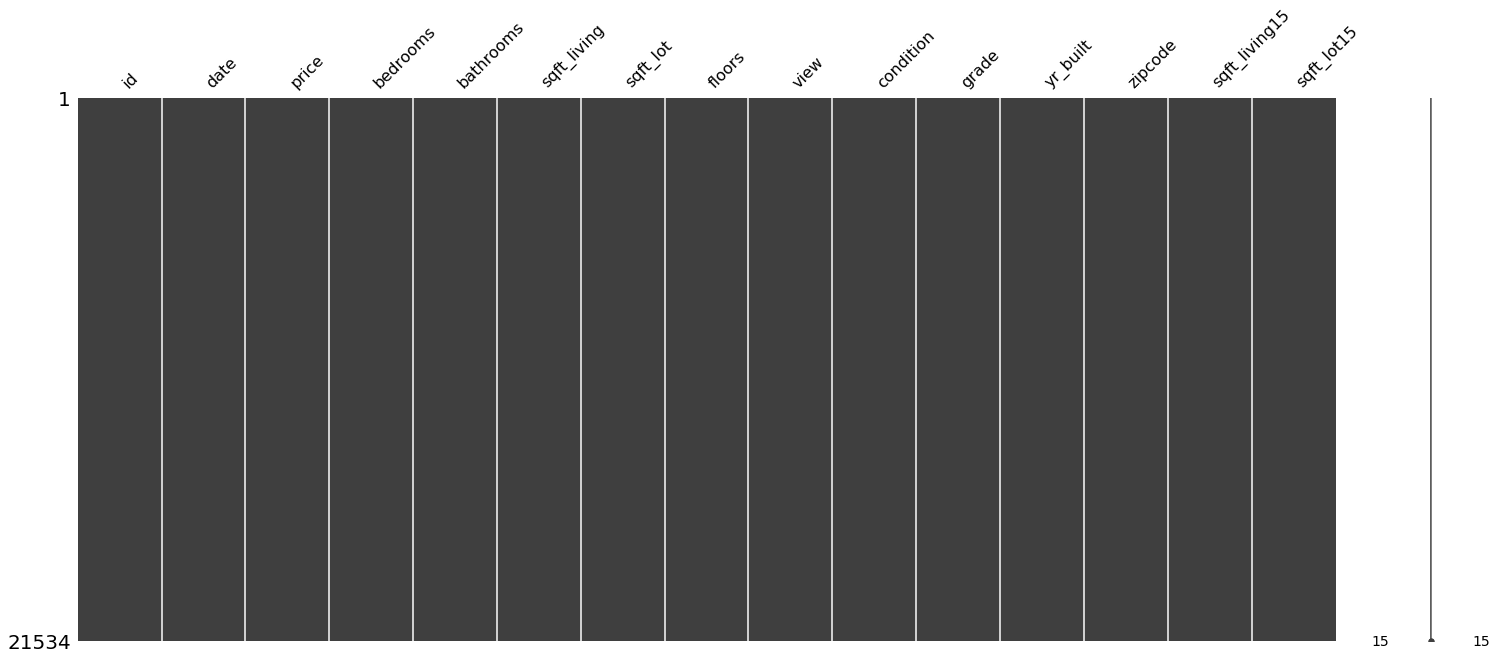

In [8]:
msno.matrix(kcdf)

In [9]:
check_duplicates(kcdf)

You're all clear


In [10]:
pickled_KC= pd.to_pickle(kcdf, './data/cleaned_KC.pkl')

In [11]:
cleaned_KC = pd.read_pickle('./data/cleaned_KC.pkl')

In [12]:
cleaned_KC.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,98178,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074,1800,7503
